In [1]:
# Use sample CIFAR10 image
# Create a function that performs the jigsaw augmentation
# Should do number of pieces

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root="../../Data/", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [64]:
import matplotlib.pyplot as plt
import numpy as np 
import math

def imshow(img):
    print(type(img))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

In [12]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [16]:
classes[labels[0]]

'frog'

<class 'torch.Tensor'>


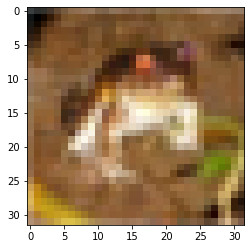

In [65]:
imshow(images[0])

In [19]:
images[0].shape

torch.Size([3, 32, 32])

In [62]:
# Assuming channel first
# Assumptions - image is square, num_pieces is a perfect square
def jigsaw(img, num_pieces=9):
    print(type(img))
    if math.isqrt(num_pieces) ** 2 != num_pieces:
        print("Please use a perfect square")
    elif img.shape[-2] != img.shape[-1]:
        print("Please use a square image")
    elif img.shape[-2] % math.isqrt(num_pieces) != 0:
        print("Make sure the image size and number of pieces are compatible")
    print("Image and num_pieces are compatible")
    # Pixel size of one patch
    piece_size = img.shape[1] // math.isqrt(num_pieces)
    print(piece_size)
    # List to store patches
    pieces = []
    # Extract patches - is there a faster way to do this?
    for i in range(math.isqrt(num_pieces)):
        for j in range(math.isqrt(num_pieces)):
            pieces.append(img[:, piece_size*i:piece_size*(i+1), piece_size*j:piece_size*(j+1)])
    # Shuffle
    np.random.shuffle(pieces)
    # Reassemble
    new_img = np.zeros(img.shape)
    idx = 0
    for i in range(math.isqrt(num_pieces)):
        for j in range(math.isqrt(num_pieces)):
            new_img[:, piece_size*i:piece_size*(i+1), piece_size*j:piece_size*(j+1)] = pieces[idx]
            idx += 1
    return torch.Tensor(new_img)
    
    

In [71]:
new_img = jigsaw(images[0], num_pieces=)

<class 'torch.Tensor'>
Image and num_pieces are compatible
4


<class 'torch.Tensor'>


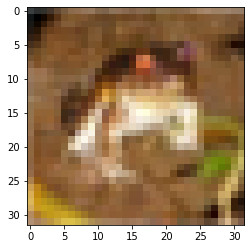

<class 'torch.Tensor'>


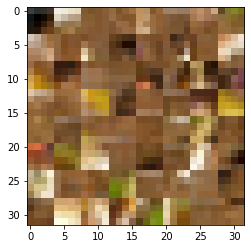

(None, None)

In [72]:
imshow(images[0]), imshow(new_img)

In [48]:
pieces[0]

tensor([[[0.9608, 0.9373, 0.9176, 0.9059, 0.7647, 0.5882, 0.8157, 0.9804,
          0.8902, 0.6392, 0.5686, 0.5608, 0.5490, 0.5333, 0.4745, 0.4471],
         [0.8784, 0.7882, 0.7216, 0.7098, 0.7451, 0.6667, 0.7020, 0.9059,
          0.8745, 0.6353, 0.5725, 0.5490, 0.5451, 0.5686, 0.5569, 0.5020],
         [0.6510, 0.5725, 0.5843, 0.6157, 0.7216, 0.8471, 0.8314, 0.9255,
          0.9255, 0.6510, 0.5333, 0.5255, 0.5098, 0.4980, 0.5373, 0.5922],
         [0.4980, 0.5922, 0.6471, 0.5176, 0.5922, 0.7922, 0.9412, 0.9412,
          0.8706, 0.6118, 0.4667, 0.4706, 0.4392, 0.3922, 0.3882, 0.5490],
         [0.5843, 0.6745, 0.5765, 0.5020, 0.5529, 0.6784, 0.7922, 0.7451,
          0.7765, 0.5961, 0.3922, 0.4275, 0.4667, 0.4745, 0.4235, 0.5333],
         [0.5961, 0.6000, 0.5569, 0.5529, 0.5294, 0.5333, 0.5804, 0.5529,
          0.5529, 0.5412, 0.4353, 0.4353, 0.4745, 0.5059, 0.5412, 0.7020],
         [0.5725, 0.5843, 0.6000, 0.5843, 0.5647, 0.5647, 0.5686, 0.5608,
          0.5059, 0.4824, 0.4863